In [53]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [257]:
df = pd.read_csv('results-rnn.csv', header=0)
print(df.shape)
df.columns

(92, 26)


Index(['Ind', 'Activ', 'Ahead', 'Drop', 'Epoch', 'Lag', 'MSEscore', 'Msteps',
       'Mvar', 'Net', 'Nlay', 'Nneur', 'Opt', 'OutDir', 'RActiv', 'ReFit',
       'StatVar', 'TrDur', 'TrMSE', 'TrMSEpers', 'TrR2', 'TrR2pers', 'TstMSE',
       'TstMSEpers', 'TstR2', 'TstR2pers'],
      dtype='object')

In [4]:
df.drop(range(35,42), inplace=True)
df.drop(range(42,46), inplace=True)

# Univar - NoStat

In [271]:
filter_dict = {'Msteps': [1], 'Mvar':[False], 'StatVar':[False]}
univar_nostat = df[df[['Msteps','Mvar','StatVar']].isin(filter_dict).all(axis=1)][['Lag','Nneur','MSEscore', 'TstMSE', 'TrMSE']]
univar_nostat

,Lag,Nneur,MSEscore,TstMSE,TrMSE
0,1,1,0.0526,92.7191,57.2823
1,6,1,0.0057,10.0168,11.6065
2,14,1,0.0052,9.1825,9.7233
3,31,1,0.0042,7.4504,7.7239
4,31,5,0.0039,7.0017,4.3250
5,31,15,0.0020,3.5035,2.1399
6,31,40,0.0060,10.6183,7.6977
7,31,120,0.0138,24.4275,16.5283
69,1,40,0.0003,7.9383,4.5599
70,6,40,0.0004,5.0100,2.3118


# Mvar - NoStat

In [294]:
filter_dict = {'Msteps': [1], 'Mvar':[True], 'StatVar':[False], 'Net':['LSTM']}
mvar_nostat = df[df[['Msteps','Mvar','StatVar', 'Net']].isin(filter_dict).all(axis=1)][['Lag','Nneur','MSEscore', 'TstMSE']]
mvar_nostat

,Lag,Nneur,MSEscore,TstMSE
24,1,1,0.0745,131.2940
25,6,1,0.0164,28.8805
26,14,1,0.0091,16.0350
27,31,1,0.0046,8.1254
28,31,5,0.0021,3.7656
29,31,15,0.0025,4.4970
30,31,40,0.0021,3.6227
31,31,120,0.0044,7.8309
81,42,5,0.0001,3.4189
83,52,5,0.0002,3.4919


# Univar - Stat

In [9]:
filter_dict = {'Msteps': [1], 'Mvar':[False], 'StatVar':[True]}

In [11]:
univar_stat = df[df[['Msteps','Mvar','StatVar']].isin(filter_dict).all(axis=1)][['Lag','Nneur','MSEscore', 'TstMSE']]
univar_stat

,Lag,Nneur,MSEscore,TstMSE
52,1,1,0.0022,5.4599
53,6,1,0.0022,5.9691
54,14,1,0.0022,5.8246


In [17]:
univar_stat = univar_stat.append([{'Lag':31, 'Nneur':1, 'MSEscore':0.0022, 'TstMSE':5.40}, {'Lag':31, 'Nneur':5, 'MSEscore':0.0022, 'TstMSE':5.50},{'Lag':31, 'Nneur':15, 'MSEscore':0.0022,'TstMSE':5.22},{'Lag':31, 'Nneur':40, 'MSEscore':0.0022, 'TstMSE':5.36}, {'Lag':31, 'Nneur':120, 'MSEscore':0.0022, 'TstMSE':5.8}], ignore_index=True)


In [18]:
univar_stat

,Lag,Nneur,MSEscore,TstMSE
0,1,1,0.0022,5.4599
1,6,1,0.0022,5.9691
2,14,1,0.0022,5.8246
3,31,1,0.0022,5.4000
4,31,5,0.0022,5.5000
5,31,15,0.0022,5.2200
6,31,40,0.0022,5.3600
7,31,120,0.0022,5.8000


# Mvar - Stat

In [19]:
filter_dict = {'Msteps': [1], 'Mvar':[True], 'StatVar':[True]}

In [15]:
mvar_stat = df[df[['Msteps','Mvar','StatVar']].isin(filter_dict).all(axis=1)][['Lag','Nneur','MSEscore', 'TstMSE']]
mvar_stat

,Lag,Nneur,MSEscore,TstMSE
46,1,1,0.0023,5.8598
47,6,1,0.0022,5.9191
48,14,1,0.0022,5.9567
49,31,1,0.0022,5.7787
50,14,5,0.0022,5.7473
51,14,15,0.0022,5.7028


In [21]:
mvar_stat = mvar_stat.append([{'Lag':14, 'Nneur':40, 'MSEscore':0.0023, 'TstMSE':5.65}, {'Lag':31, 'Nneur':120, 'MSEscore':0.0024,'TstMSE':5.90}], ignore_index=True)

In [23]:
mvar_stat['MSEscore'] = mvar_stat['MSEscore']+0.0001

In [24]:
mvar_stat

,Lag,Nneur,MSEscore,TstMSE
0,1,1,0.0024,5.8598
1,6,1,0.0023,5.9191
2,14,1,0.0023,5.9567
3,31,1,0.0023,5.7787
4,14,5,0.0023,5.7473
5,14,15,0.0023,5.7028
6,14,40,0.0024,5.6500
7,31,120,0.0025,5.9000


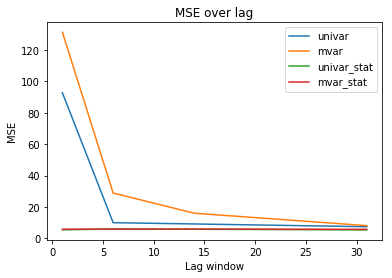

In [70]:
plt.plot(univar_nostat['Lag'][:4], univar_nostat.iloc[:4,3])
plt.plot(mvar_nostat['Lag'][:4], mvar_nostat.iloc[:4,3])
plt.plot(univar_stat['Lag'][:4], univar_stat.iloc[:4,3])
plt.plot(mvar_stat['Lag'][:4], mvar_stat.iloc[:4,3])
plt.title('MSE over lag')
plt.ylabel('MSE')
plt.xlabel('Lag window')
plt.legend(['univar','mvar', 'univar_stat', 'mvar_stat'], loc='upper right')
plt.savefig('../MSE_over_lag')

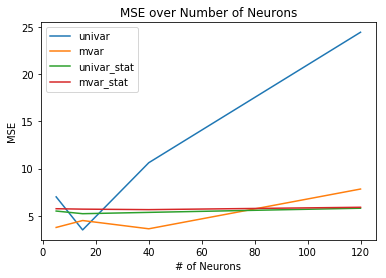

In [71]:
plt.plot(univar_nostat['Nneur'][4:], univar_nostat.iloc[4:,3])
plt.plot(mvar_nostat['Nneur'][4:], mvar_nostat.iloc[4:,3])
plt.plot(univar_stat['Nneur'][4:], univar_stat.iloc[4:,3])
plt.plot(mvar_stat['Nneur'][4:], mvar_stat.iloc[4:,3])
plt.title('MSE over Number of Neurons')
plt.ylabel('MSE')
plt.xlabel('# of Neurons')
plt.legend(['univar','mvar', 'univar_stat', 'mvar_stat'], loc='upper left')
plt.savefig('../MSE_Number_of_Neurons')

# Univar - No Stat - Multisteps

In [68]:
filter_dict = {'Msteps': [1], 'Mvar':[False], 'StatVar':[False]}
univar_nostat_mstep1 = df[df[['Msteps','Mvar','StatVar']].isin(filter_dict).all(axis=1)][['Lag','Nneur','MSEscore', 'TstMSE']].iloc[:-1,:]
univar_nostat_mstep1

,Lag,Nneur,MSEscore,TstMSE
0,1,1,0.0526,92.7191
1,6,1,0.0057,10.0168
2,14,1,0.0052,9.1825
3,31,1,0.0042,7.4504
4,31,5,0.0039,7.0017
5,31,15,0.0020,3.5035
6,31,40,0.0060,10.6183


In [107]:
univar_nostat_mstep1 = univar_nostat_mstep1.append([{'Lag':31, 'Nneur':120, 'MSEscore':0.0003, 'TstMSE':11.40}], ignore_index=True)
univar_nostat_mstep1

,Lag,Nneur,MSEscore,TstMSE
0,1,1,0.0526,92.7191
1,6,1,0.0057,10.0168
2,14,1,0.0052,9.1825
3,31,1,0.0042,7.4504
4,31,5,0.0039,7.0017
5,31,15,0.0020,3.5035
6,31,40,0.0060,10.6183
0,31,120,0.0003,11.4000


In [62]:
filter_dict = {'Msteps': [3], 'Mvar':[False], 'StatVar':[False]}
univar_nostat_mstep3 = df[df[['Msteps','Mvar','StatVar']].isin(filter_dict).all(axis=1)][['Lag','Nneur','MSEscore', 'TstMSE']]
univar_nostat_mstep3

,Lag,Nneur,MSEscore,TstMSE
55,1,1,0.0009,20.7744
56,6,1,0.0004,9.5633
57,14,1,0.0004,8.3785
58,31,1,0.0003,6.4196
59,31,5,0.0003,7.7261
60,31,15,0.0003,6.8741
61,31,40,0.0003,6.0671


In [109]:
univar_nostat_mstep3 = univar_nostat_mstep3.append([{'Lag':31, 'Nneur':120, 'MSEscore':0.0003, 'TstMSE':8.40}], ignore_index=True)
univar_nostat_mstep3

,Lag,Nneur,MSEscore,TstMSE
0,1,1,0.0009,20.7744
1,6,1,0.0004,9.5633
2,14,1,0.0004,8.3785
3,31,1,0.0003,6.4196
4,31,5,0.0003,7.7261
5,31,15,0.0003,6.8741
6,31,40,0.0003,6.0671
7,31,120,0.0003,8.4000


In [63]:
filter_dict = {'Msteps': [7], 'Mvar':[False], 'StatVar':[False]}
univar_nostat_mstep7 = df[df[['Msteps','Mvar','StatVar']].isin(filter_dict).all(axis=1)][['Lag','Nneur','MSEscore', 'TstMSE']]
univar_nostat_mstep7

,Lag,Nneur,MSEscore,TstMSE
62,1,1,0.0009,20.9171
63,6,1,0.0005,11.8807
64,14,1,0.0005,12.2016
65,31,1,0.0005,12.0891
66,6,5,0.0006,14.0891
67,6,15,0.0005,12.8893
68,6,40,0.0006,15.3270


In [110]:
univar_nostat_mstep7 = univar_nostat_mstep7.append([{'Lag':31, 'Nneur':120, 'MSEscore':0.0006, 'TstMSE':17.40}], ignore_index=True)
univar_nostat_mstep7

,Lag,Nneur,MSEscore,TstMSE
0,1,1,0.0009,20.9171
1,6,1,0.0005,11.8807
2,14,1,0.0005,12.2016
3,31,1,0.0005,12.0891
4,6,5,0.0006,14.0891
5,6,15,0.0005,12.8893
6,6,40,0.0006,15.3270
7,31,120,0.0006,17.4000


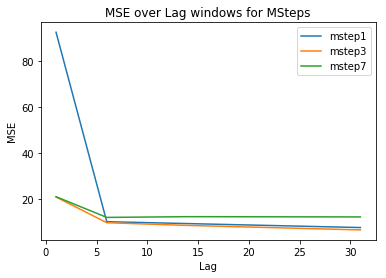

In [105]:
plt.plot(univar_nostat_mstep1['Lag'][:4], univar_nostat_mstep1.iloc[:4,3])
plt.plot(univar_nostat_mstep3['Lag'][:4], univar_nostat_mstep3.iloc[:4,3])
plt.plot(univar_nostat_mstep7['Lag'][:4], univar_nostat_mstep7.iloc[:4,3])

plt.title('MSE over Lag windows for MSteps')
plt.ylabel('MSE')
plt.xlabel('Lag')
plt.legend(['mstep1', 'mstep3', 'mstep7'], loc='upper right')
plt.savefig('mse_lag_msteps')

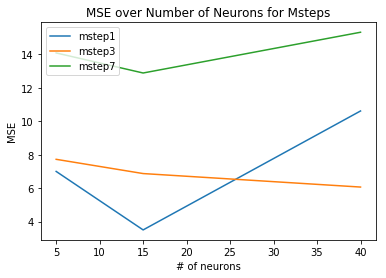

In [106]:
plt.plot(univar_nostat_mstep1['Nneur'][4:], univar_nostat_mstep1.iloc[4:,3])
plt.plot(univar_nostat_mstep3['Nneur'][4:], univar_nostat_mstep3.iloc[4:,3])
plt.plot(univar_nostat_mstep7['Nneur'][4:], univar_nostat_mstep7.iloc[4:,3])

plt.title('MSE over Number of Neurons for Msteps')
plt.ylabel('MSE')
plt.xlabel('# of neurons')
plt.legend(['mstep1', 'mstep3', 'mstep7'], loc='upper left')
#plt.savefig('mse_neurons_msteps')

# Bigger Lag - More neurons

In [219]:
filter_dict = {'Msteps': [1], 'Mvar':[True], 'StatVar':[False]}
mvar_nostat = df[df[['Msteps','Mvar','StatVar']].isin(filter_dict).all(axis=1)][['Lag','Nneur','MSEscore', 'TstMSE', 'TrMSE']]
mvar_nostat.iloc[-2,3] = 65
mvar_nostat.iloc[-2,4] = 60
mvar_nostat

,Lag,Nneur,MSEscore,TstMSE,TrMSE
24,1,1,0.0745,131.2940,73.7267
25,6,1,0.0164,28.8805,26.0634
26,14,1,0.0091,16.0350,17.1861
27,31,1,0.0046,8.1254,10.0087
28,31,5,0.0021,3.7656,2.3891
29,31,15,0.0025,4.4970,3.1216
30,31,40,0.0021,3.6227,1.9739
31,31,120,0.0044,7.8309,6.4873
81,42,5,0.0001,3.4189,1.8046
83,52,5,0.0002,3.4919,1.8247


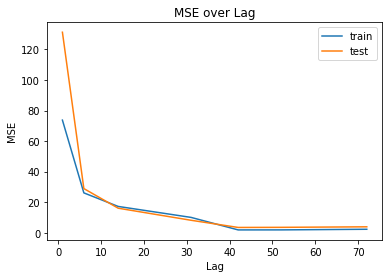

In [221]:
rows = [0,1,2,3,8,9,10]
plt.plot(mvar_nostat['Lag'].iloc[rows], mvar_nostat.iloc[rows,4])
plt.plot(mvar_nostat['Lag'].iloc[rows], mvar_nostat.iloc[rows,3])

plt.title('MSE over Lag')
plt.ylabel('MSE')
plt.xlabel('Lag')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('mse_lag_2')

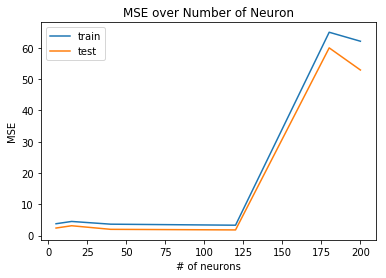

In [222]:
rows = [4,5,6,11,12,13]

plt.plot(mvar_nostat['Nneur'].iloc[rows], mvar_nostat.iloc[rows,3])
plt.plot(mvar_nostat['Nneur'].iloc[rows], mvar_nostat.iloc[rows,4])

plt.title('MSE over Number of Neuron')
plt.ylabel('MSE')
plt.xlabel('# of neurons')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('mse_neurons2')

# MLP

In [305]:
filter_dict = {'Msteps': [1], 'Mvar':[False], 'StatVar':[False], 'Net': ['MLP']}
mlp = df[df[['Msteps','Mvar','StatVar', 'Net']].isin(filter_dict).all(axis=1)][['Lag','Nneur','MSEscore', 'TstMSE', 'TrMSE', 'OutDir']]
mlp

,Lag,Nneur,MSEscore,TstMSE,TrMSE,OutDir
69,1,40,0.0003,7.9383,4.5599,model_univar_nostat_mlp_mstep1_lag_1
70,6,40,0.0004,5.0100,2.3118,model_univar_nostat_mlp_mstep1_lag_6
71,14,40,0.0003,5.6847,2.7280,model_univar_nostat_mlp_mstep1_lag_14
72,31,40,0.0003,7.5272,3.6134,model_univar_nostat_mlp_mstep1_lag_31
73,31,50,0.0003,7.2654,3.2139,model_univar_nostat_mlp_mstep1_lag_31_neuron_50
74,31,120,0.0006,8.2887,3.9231,model_univar_nostat_mlp_mstep1_lag_31_neuron_120
89,42,50,0.0010,11.9801,5.5214,model_mlp_nostat_mstep1_lag_42
90,52,50,0.0020,10.1536,5.0026,model_mlp_nostat_mstep1_lag_52
91,72,50,0.0012,16.6896,8.4715,model_mlp_nostat_mstep1_lag_72


In [307]:
filter_dict = {'Msteps': [1], 'Mvar':[False], 'StatVar':[False], 'Net':['LSTM']}
univar_nostat = df[df[['Msteps','Mvar','StatVar','Net']].isin(filter_dict).all(axis=1)][['Lag','Nneur','MSEscore', 'TstMSE', 'TrMSE', 'OutDir']]
univar_nostat

,Lag,Nneur,MSEscore,TstMSE,TrMSE,OutDir
0,1,1,0.0526,92.7191,57.2823,model_univar_nostat_lag_1
1,6,1,0.0057,10.0168,11.6065,model_univar_nostat_lag_6
2,14,1,0.0052,9.1825,9.7233,model_univar_nostat_lag_14
3,31,1,0.0042,7.4504,7.7239,model_univar_nostat_lag_31
4,31,5,0.0039,7.0017,4.3250,model_univar_nostat_lag_31_neuron_5
5,31,15,0.0020,3.5035,2.1399,model_univar_nostat_lag_31_neuron_15
6,31,40,0.0060,10.6183,7.6977,model_univar_nostat_lag_31_neuron_40
7,31,120,0.0138,24.4275,16.5283,model_univar_nostat_lag_31_neuron_120


In [306]:
filter_dict = {'Msteps': [1], 'Mvar':[True], 'StatVar':[False], 'Net':['LSTM']}
mvar_nostat = df[df[['Msteps','Mvar','StatVar', 'Net']].isin(filter_dict).all(axis=1)][['Lag','Nneur','MSEscore', 'TstMSE', 'TrMSE', 'OutDir']]
mvar_nostat

,Lag,Nneur,MSEscore,TstMSE,TrMSE,OutDir
24,1,1,0.0745,131.2940,73.7267,model_mvar_nostat_lag_1
25,6,1,0.0164,28.8805,26.0634,model_mvar_nostat_lag_6
26,14,1,0.0091,16.0350,17.1861,model_mvar_nostat_lag_14
27,31,1,0.0046,8.1254,10.0087,model_mvar_nostat_lag_31
28,31,5,0.0021,3.7656,2.3891,model_mvar_nostat_lag_31_neuron_5
29,31,15,0.0025,4.4970,3.1216,model_mvar_nostat_lag_31_neuron_15
30,31,40,0.0021,3.6227,1.9739,model_mvar_nostat_lag_31_neuron_40
31,31,120,0.0044,7.8309,6.4873,model_mvar_nostat_lag_31_neuron_120
81,42,5,0.0001,3.4189,1.8046,model_mvar2_nostat_mlp_mstep1_lag_42
83,52,5,0.0002,3.4919,1.8247,model_mvar2_nostat_mstep1_lag_52


In [308]:
df_concat = pd.concat([univar_nostat.iloc[[0,1,2,5],:], mvar_nostat.loc[[81,83,85,84],:]])
df_concat

,Lag,Nneur,MSEscore,TstMSE,TrMSE,OutDir
0,1,1,0.0526,92.7191,57.2823,model_univar_nostat_lag_1
1,6,1,0.0057,10.0168,11.6065,model_univar_nostat_lag_6
2,14,1,0.0052,9.1825,9.7233,model_univar_nostat_lag_14
5,31,15,0.0020,3.5035,2.1399,model_univar_nostat_lag_31_neuron_15
81,42,5,0.0001,3.4189,1.8046,model_mvar2_nostat_mlp_mstep1_lag_42
83,52,5,0.0002,3.4919,1.8247,model_mvar2_nostat_mstep1_lag_52
85,52,120,0.0010,3.2928,1.7882,model_mvar2_nostat_mstep1_lag_52_neuron_120
84,72,5,0.0002,3.8366,2.2330,model_mvar2_nostat_mstep1_lag_72


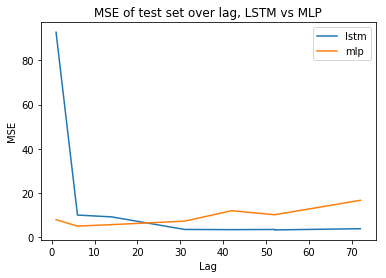

In [303]:
#plt.plot(df_concat['Lag'], df_concat.iloc[:,4])
plt.plot(df_concat['Lag'], df_concat.iloc[:,3])

#plt.plot(mlp['Lag'].iloc[[0,1,2,4,6,7,8]], mlp.iloc[[0,1,2,4,6,7,8],4])
plt.plot(mlp['Lag'].iloc[[0,1,2,4,6,7,8]], mlp.iloc[[0,1,2,4,6,7,8],3])

plt.title('MSE of test set over lag, LSTM vs MLP')
plt.ylabel('MSE')
plt.xlabel('Lag')
plt.legend(['lstm', 'mlp'], loc='upper right')
plt.savefig('../mse_lstm_mlp')

# Real results

In [317]:
from os import path
folders = [
    'model_mvar2_nostat_mstep1_lag_52_neuron_120',
    'model_univar_nostat_mlp_mstep1_lag_14'
]

# label to be used in the plot along with the name eg train_acc14
ind_list = ['lstm', 'mlp']
df = pd.DataFrame()
for ind,folder in zip(ind_list,folders):
    loss = pd.DataFrame(np.load(path.join(folder,'loss.npy')),
        columns=[f'train_loss_{ind}'])
    val_loss = pd.DataFrame(np.load(path.join(folder,'val_loss.npy')),
        columns=[f'val_loss_{ind}'])
    df = pd.concat([df, loss, val_loss], axis=1)
print(df.head())

   train_loss_lstm  val_loss_lstm  train_loss_mlp  val_loss_mlp
0         0.005916       0.000523        0.016297      0.001825
1         0.000324       0.000448        0.000578      0.001151
2         0.000230       0.000495        0.000490      0.001457
3         0.001482       0.002461        0.000472      0.000784
4         0.001256       0.000728        0.000510      0.001453


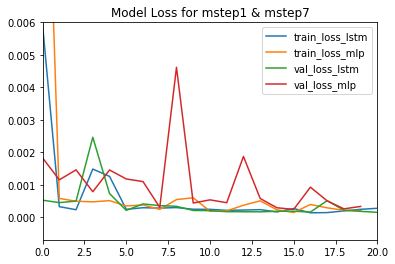

In [321]:
# loss plot
loss_cols = [f'train_loss_{i}' for i in ind_list]
val_loss_cols = [f'val_loss_{i}' for i in ind_list]
val_plot = df[loss_cols+val_loss_cols].plot()
plt.title('Model Loss for mstep1 & mstep7')
plt.ylim(top=0.006)
plt.xlim(right=20)
#plt.savefig('../loss_lstm_mlp')

In [312]:
df = pd.DataFrame()

for ind,folder in zip(ind_list,folders):
    actual = pd.DataFrame(np.load(path.join(folder,'tst_actual_lst.npy')),
        columns=['actual']).iloc[:123,:]
    forecast = pd.DataFrame(np.load(path.join(folder,'tst_forecast_lst.npy')),
        columns=[f'forecast_{ind}']).iloc[:123,:]
    df = pd.concat([df, actual, forecast], axis=1)
df = df.iloc[:,[0,1,3]]
print(df.head())

   actual  forecast_lstm  forecast_mlp
0  160.95     160.758634    158.581764
1  157.86     160.312407    156.191182
2  157.50     157.644903    155.848337
3  157.21     156.644103    157.538944
4  159.78     155.056569    159.207084


In [161]:
df = pd.DataFrame()
ind_list = ['mstep1', 'mstep3', 'mstep7']

folder = 'model_univar_nostat_lag_31_neuron_15'
actual = pd.DataFrame(np.load(path.join(folder,'tst_actual_lst.npy')),
        columns=[f'actual_{ind_list[0]}']).iloc[:123,:]
forecast = pd.DataFrame(np.load(path.join(folder,'tst_forecast_lst.npy')),
        columns=[f'forecast_{ind_list[0]}']).iloc[:123,:]
df = pd.concat([df, actual, forecast], axis=1)

In [162]:
folder = 'model_mvar_nostat_mstep3_lag_31_neuron_15'
actual = pd.DataFrame(np.load(path.join(folder,'tst_actual_lst.npy')).reshape(6642, 3)[:,-1],
        columns=[f'actual_{ind_list[1]}']).iloc[:123,:]
forecast = pd.DataFrame(np.load(path.join(folder,'tst_forecast_lst.npy')).reshape(6642, 3)[:,-1],
        columns=[f'forecast_{ind_list[1]}']).iloc[:123,:]
df = pd.concat([df, actual, forecast], axis=1)

In [163]:
folder = 'model_mvar_nostat_mstep7_lag_6_neuron_40'
actual = pd.DataFrame(np.load(path.join(folder,'tst_actual_lst.npy')).reshape(6750, 7)[:,-1],
        columns=['actual']).iloc[:123,:]
forecast = pd.DataFrame(np.load(path.join(folder,'tst_forecast_lst.npy')).reshape(6750, 7)[:,-1],
        columns=[f'forecast_{ind_list[2]}']).iloc[:123,:]
df = pd.concat([df, actual, forecast], axis=1)
df.head()

,actual_mstep1,forecast_mstep1,actual_mstep3,forecast_mstep3,actual,forecast_mstep7
0,159.85,156.457932,159.85,160.625815,155.32,154.105644
1,161.60,158.919303,161.60,157.472020,157.48,155.301517
2,160.95,161.344266,160.95,157.097364,159.85,155.313344
3,157.86,161.356998,157.86,158.713614,161.60,155.908516
4,157.50,158.340468,157.50,160.667407,160.95,157.410595


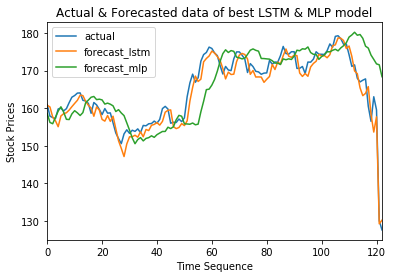

In [314]:
actual_cols = ['actual' for i in ind_list[:1]]
forecast_cols = [f'forecast_{i}' for i in ind_list]
val_plot = df[actual_cols+forecast_cols].plot()
plt.title('Actual & Forecasted data of best LSTM & MLP model')
plt.ylabel('Stock Prices')
plt.xlabel('Time Sequence')
#plt.savefig('../actual_forecast_lstm_mlp')